# Lab 2 Exercise - Linear Regression Competition

Worked with Isabelle Ng

In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")

In [3]:
X_train.shape

(8000, 10)

In [4]:
y_train.shape

(8000,)

In [5]:
X_test.shape

(16000, 10)

In [6]:
# --- Paste the modified quantile_plot function from above here ---
def quantile_plot(x, y, ax, by=None, bins=10, by_bins=3, y_fn=np.mean):
    assert len(x) == len(y)
    def qp_data(x, y):
        fac = np.searchsorted(np.quantile(x, q=[i / bins for i in range(1, bins)]), x)
        ufac = np.unique(fac)
        qx = np.array([np.mean(x[fac == f]) for f in ufac])
        qy = np.array([y_fn(y[fac == f]) for f in ufac])
        return qx, qy
    qx, qy = qp_data(x, y)
    if by is None:
        ax.plot(qx, qy, "-o")
    else:
        assert len(x) == len(by)
        ax.plot(qx, qy, "-o", label="ALL", color="lightgrey")
        by_fac = np.searchsorted(np.quantile(by, q=[i / by_bins for i in range(1, by_bins)]), by)
        by_ufac = np.unique(by_fac)
        for i, f in enumerate(np.unique(by_ufac)):
            mask = by_fac == f
            nm = f"{i}) {min(by[mask]):.2f} / {max(by[mask]):.2f}"
            qx, qy = qp_data(x[mask], y[mask])
            ax.plot(qx, qy, "-o", label=nm)
        ax.legend()
# --- End of function definition ---

## Converting numpy array to pandas dataframe

In [7]:
var_count = X_train.shape[1]
train_count = X_train.shape[0]
test_count = X_test.shape[0]
var_list = ["v_"+str(i) for i in range(1, var_count+1)]

In [8]:
X_train_df = pd.DataFrame(X_train, columns=var_list)
X_test_df = pd.DataFrame(X_test, columns=var_list)
y_train_df = pd.DataFrame(y_train, columns=['y'])

In [9]:
X_train_df.head(2)

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
0,-1.030086,0.744488,0.937688,-1.909721,0.441239,-1.749620,0.077734,1.137308,0.370874,0.155145
1,0.151172,0.386191,-0.422696,1.739644,0.588353,-0.008641,0.670548,0.985404,0.032382,-1.376448


In [10]:
X_test_df.head(2)

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
0,-0.178913,-1.270879,0.445100,1.547729,0.546413,2.377554,-1.125253,-0.017077,1.419819,-0.629672
1,-2.479271,-0.870515,0.205303,-0.995020,2.805032,2.656087,0.779858,1.628302,1.201014,0.155298


In [11]:
y_train_df.head(2)

,y
0,16.566999
1,13.711711


## EDA
1. Getting null count
2. Getting distributions of each feature
3. Getting spread of each feature w.r.t y

In [12]:
X_train_df.describe()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.005068,0.003536,0.002277,-0.018162,0.791757,0.028068,-0.003231,0.800376,-0.000086,0.009396
std,1.005833,0.999082,0.577940,1.160943,0.601678,1.446540,0.989907,1.177576,1.008131,1.011339
min,-3.721005,-3.648331,-0.999782,-1.999753,0.000117,-8.682783,-3.603690,-3.221563,-4.507306,-3.693629
25%,-0.676857,-0.673515,-0.497092,-1.032125,0.311250,-0.661313,-0.681760,0.001374,-0.677126,-0.673832
50%,-0.008288,-0.009898,0.000410,-0.029931,0.667525,0.023345,0.010970,0.750908,0.010491,0.022640
75%,0.697822,0.665128,0.509849,0.978363,1.141792,0.699970,0.673435,1.571433,0.664620,0.705872
max,3.337348,3.971553,0.999837,1.999695,3.793571,9.275228,3.585471,5.956151,3.467832,3.936592


In [13]:
X_test_df.describe()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.006206,-0.004799,0.003992,-0.003041,0.796917,0.000878,0.012057,0.802917,-0.012733,-0.004089
std,0.992939,1.002004,0.575552,1.156562,0.603124,1.414488,0.997495,1.169840,1.005042,0.991637
min,-3.975253,-3.834519,-0.999789,-1.999749,0.000074,-8.807018,-3.935102,-3.618808,-4.061024,-3.772752
25%,-0.666759,-0.685560,-0.497540,-1.004158,0.315657,-0.704174,-0.662492,0.000807,-0.698899,-0.666906
50%,0.003192,-0.007288,0.011670,-0.005898,0.677455,0.008730,0.026640,0.775136,-0.017685,-0.008515
75%,0.665233,0.678514,0.499902,1.001257,1.140801,0.687893,0.685748,1.559246,0.661844,0.656895
max,4.164257,3.451266,0.999755,1.999616,4.808237,10.108952,3.910771,6.293528,3.817236,3.999258


In [14]:
y_train_df.describe()

,y
count,8000.000000
mean,12.087922
std,3.637855
min,-8.224462
25%,10.007004
50%,12.243604
75%,14.303835
max,30.786868


In [15]:
import math

In [16]:
def sqr_transform(x):
    # if(abs(round(x**2, 5))<1e-4):
    #     print(x, abs(round(x**2, 5)))
    return(x**2)

def exp_transform(x):
    return(math.exp(x))

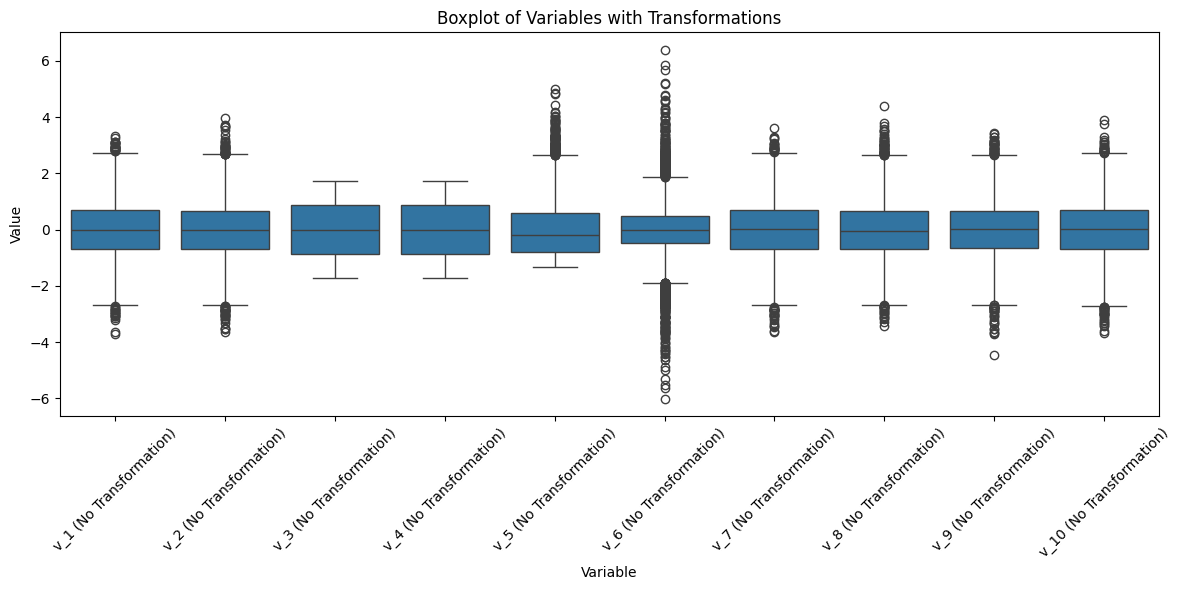

In [46]:
selected_var_dict = {'v_1': None, 'v_2': None, 'v_3': None, 'v_4': None, 'v_5': None, 
                     'v_6': None, 'v_7': None, 'v_8': None, 'v_9': None, 'v_10': None}


# Collect transformed data for each variable
boxplot_data = {}

for var_name in var_list:
    transform = selected_var_dict[var_name]
    if transform is None:
        title_ = "No Transformation"
        data_to_plot = np.array(X_train_df[var_name])
    else:
        title_ = transform.__name__
        data_to_plot = np.array(X_train_df[var_name].apply(transform))

    boxplot_data[f"{var_name} ({title_})"] = data_to_plot

# Convert to long DataFrame
df_long = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in boxplot_data.items()]))
df_long = df_long.melt(var_name="Variable", value_name="Value")

# Single boxplot with all variables
plt.figure(figsize=(12,6))
sns.boxplot(x="Variable", y="Value", data=df_long)
plt.xticks(rotation=45)
plt.title("Boxplot of Variables with Transformations")
plt.tight_layout()
plt.show()


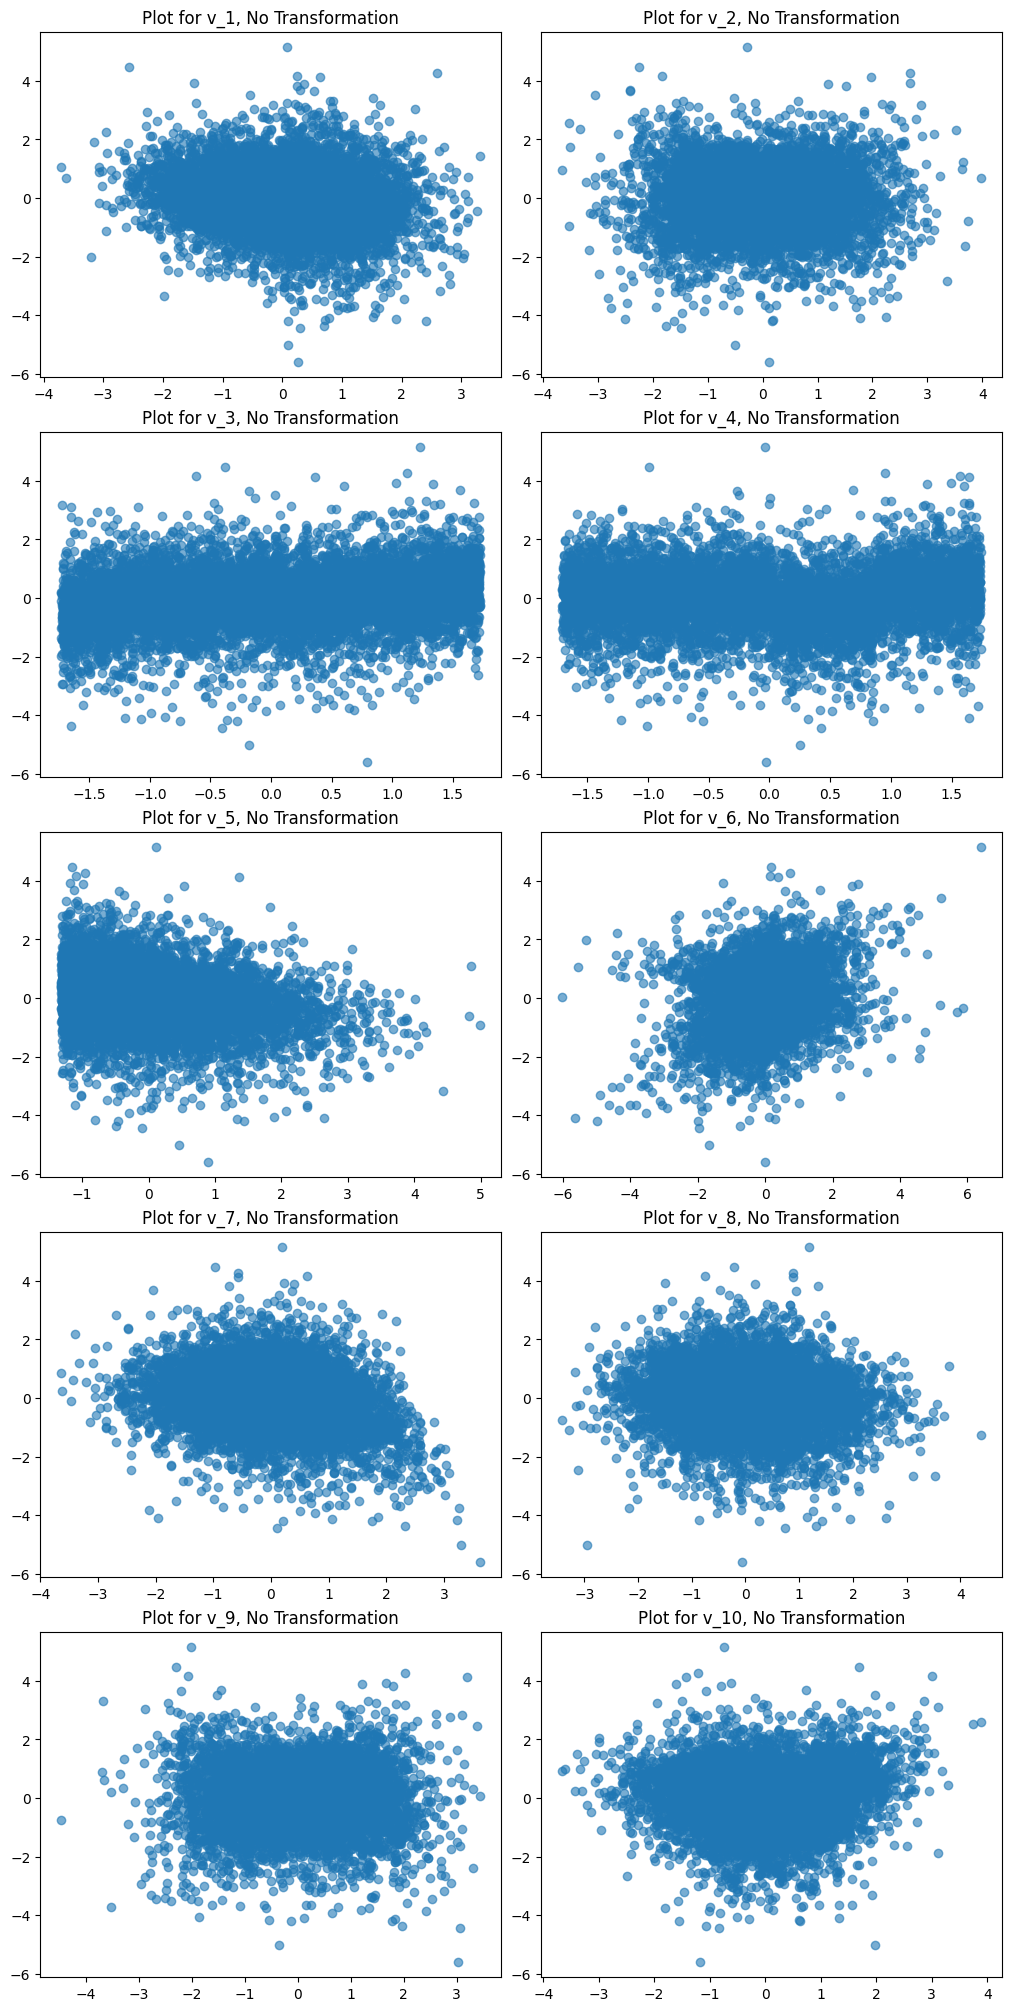

In [51]:
selected_var_dict = {'v_1': None, 'v_2': None, 'v_3': None, 'v_4': None, 'v_5': None, 
                     'v_6': None, 'v_7': None, 'v_8': None, 'v_9': None, 'v_10': None}

# 1. Determine the grid size
cols = 2  # You can adjust this
rows = math.ceil(var_count / cols)

# 2. Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)

# 3. Flatten the axes array and loop through variables and axes
for var_name, ax in zip(var_list, axes.flatten()):
    # Prepare the data for the current variable
    if(selected_var_dict[var_name] == None):
        title_ = "No Transformation"
        data_to_plot = np.array(X_train_df[var_name])
    else:
        title_ = str(selected_var_dict[var_name]).split()[1]
        data_to_plot = np.array(X_train_df[var_name].apply(selected_var_dict[var_name]))

    # Call your plotting function, passing the specific axis `ax` to it
    # quantile_plot(x=data_to_plot, y=y_train, ax=ax, bins=10)
    ax.scatter(data_to_plot, y_train, alpha=0.6)

    # Set a title for each individual subplot
    ax.set_title(f'Plot for {var_name}, {title_}')

# 4. Turn off any unused subplots
for i in range(var_count, len(axes.flatten())):
    axes.flatten()[i].axis('off')

# 5. Show the final plot
plt.show()

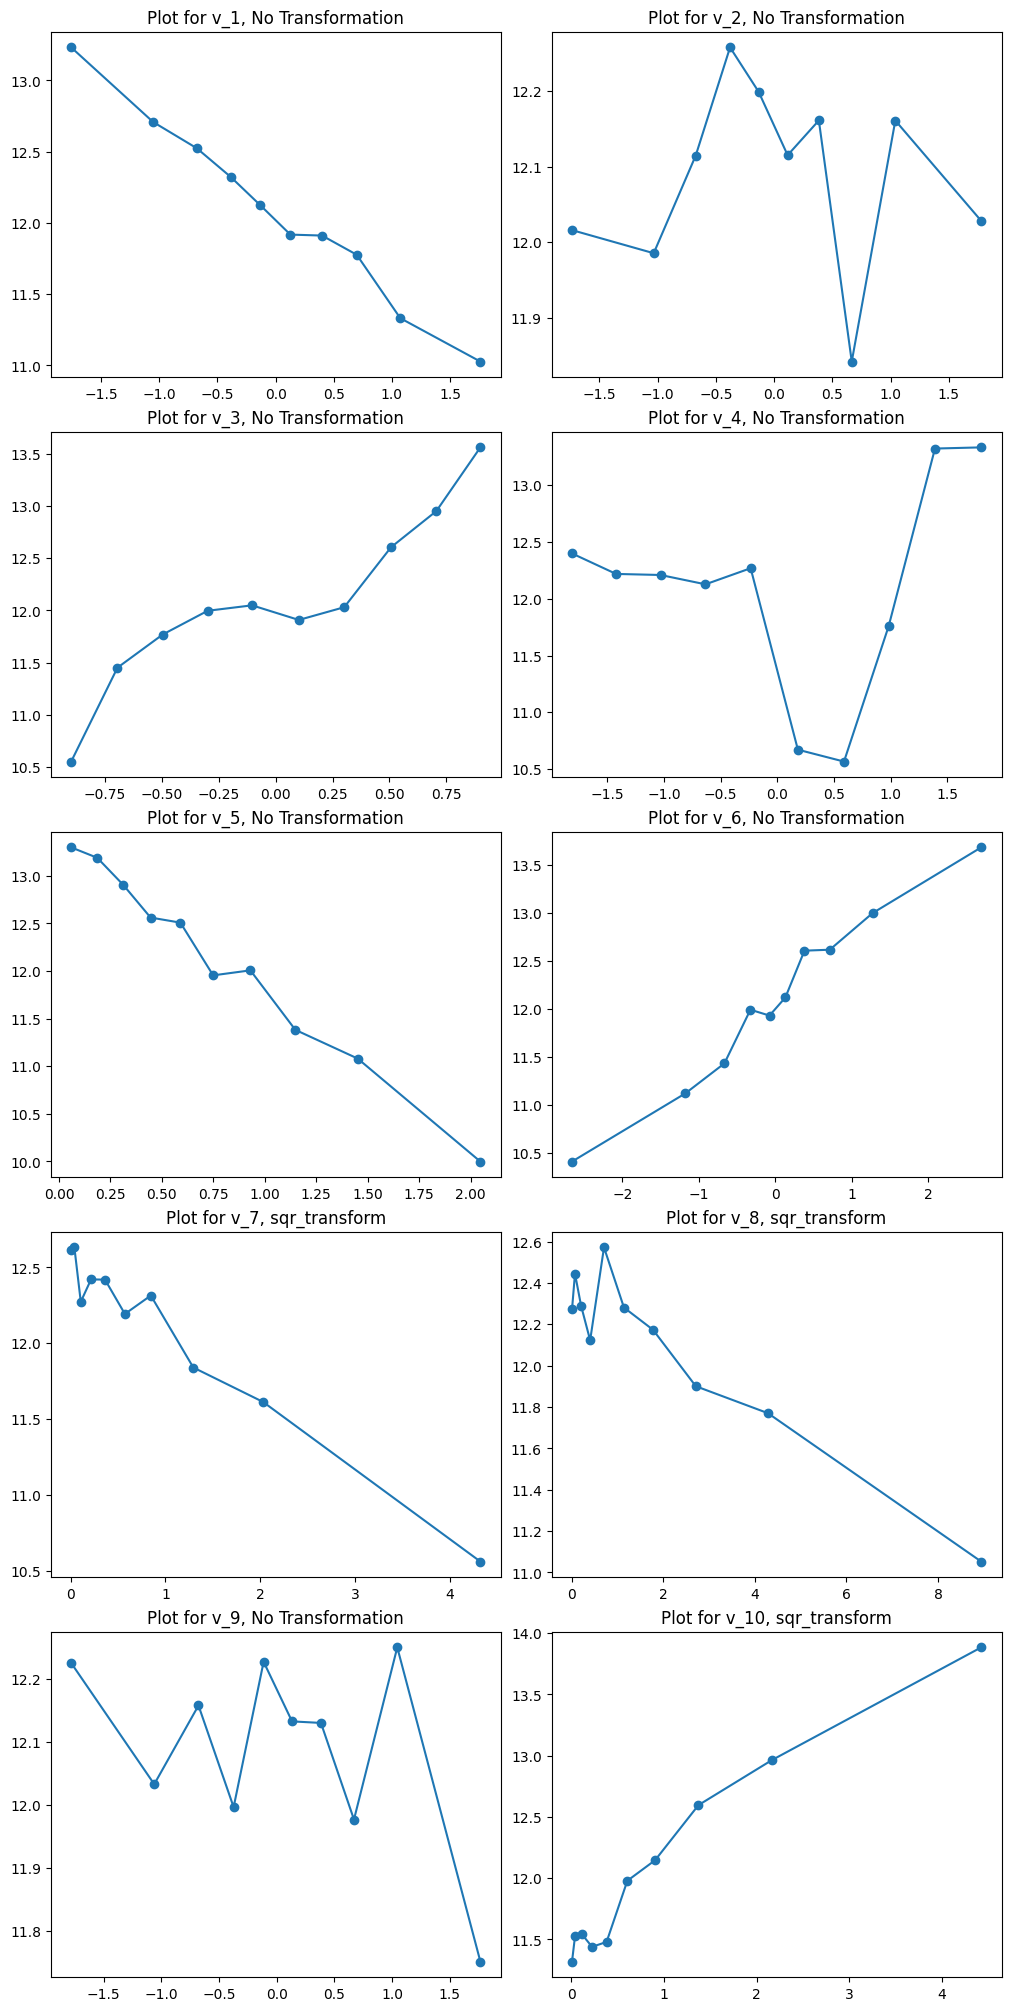

In [18]:

selected_var_dict = {'v_1': None, 'v_2': None, 'v_3': None, 'v_4': None, 'v_5': None, 
                     'v_6': None, 'v_7': sqr_transform, 'v_8': sqr_transform, 'v_9': None, 'v_10': sqr_transform}

# 1. Determine the grid size
cols = 2  # You can adjust this
rows = math.ceil(var_count / cols)

# 2. Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)

# 3. Flatten the axes array and loop through variables and axes
for var_name, ax in zip(var_list, axes.flatten()):
    # Prepare the data for the current variable
    if(selected_var_dict[var_name] == None):
        title_ = "No Transformation"
        data_to_plot = np.array(X_train_df[var_name])
    else:
        title_ = str(selected_var_dict[var_name]).split()[1]
        data_to_plot = np.array(X_train_df[var_name].apply(selected_var_dict[var_name]))

    # Call your plotting function, passing the specific axis `ax` to it
    quantile_plot(x=data_to_plot, y=y_train, ax=ax, bins=10)

    # Set a title for each individual subplot
    ax.set_title(f'Plot for {var_name}, {title_}')

# 4. Turn off any unused subplots
for i in range(var_count, len(axes.flatten())):
    axes.flatten()[i].axis('off')

# 5. Show the final plot
plt.show()

In [19]:
X_train_df.corr()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
v_1,1.000000,0.006792,-0.018348,-0.008427,0.014166,-0.000889,0.006541,-0.002595,0.011776,-0.006050
v_2,0.006792,1.000000,0.000226,-0.002990,0.012700,0.009972,0.001880,0.008801,-0.015455,0.007678
v_3,-0.018348,0.000226,1.000000,0.012148,-0.004161,0.002129,-0.019640,0.001058,-0.000673,0.006548
v_4,-0.008427,-0.002990,0.012148,1.000000,0.016135,-0.009241,0.016548,-0.000486,0.009769,0.009724
v_5,0.014166,0.012700,-0.004161,0.016135,1.000000,-0.005617,-0.018418,0.521828,-0.001536,-0.003298
v_6,-0.000889,0.009972,0.002129,-0.009241,-0.005617,1.000000,0.010839,0.005707,-0.002229,-0.009870
v_7,0.006541,0.001880,-0.019640,0.016548,-0.018418,0.010839,1.000000,-0.014214,-0.000104,-0.000611
v_8,-0.002595,0.008801,0.001058,-0.000486,0.521828,0.005707,-0.014214,1.000000,-0.002590,-0.011451
v_9,0.011776,-0.015455,-0.000673,0.009769,-0.001536,-0.002229,-0.000104,-0.002590,1.000000,-0.001182
v_10,-0.006050,0.007678,0.006548,0.009724,-0.003298,-0.009870,-0.000611,-0.011451,-0.001182,1.000000


<Axes: >

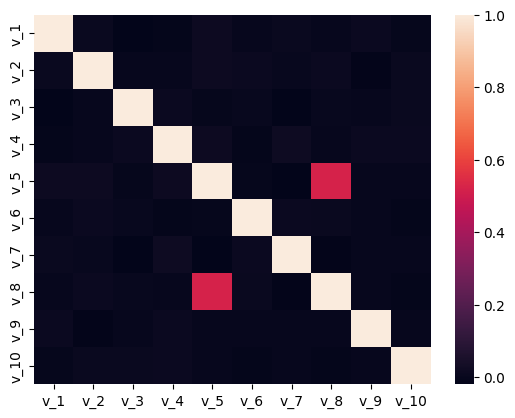

In [20]:
sns.heatmap(X_train_df.corr())

### Creating a clean version of training data which would stay untouched

In [21]:
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()
y_train_raw = y_train.copy()

X_train_raw_df = X_train_df.copy()
X_test_raw_df = X_test_df.copy()
y_train_raw_df = y_train_df.copy()

In [22]:
from sklearn import preprocessing

In [23]:
# Scaling the values using standard scaler
X_scaler = preprocessing.StandardScaler().fit(X_train_raw)
X_train = X_scaler.transform(X_train_raw)
X_test = X_scaler.transform(X_test_raw)

y_scaler = preprocessing.StandardScaler().fit(y_train_raw.reshape(-1, 1))
y_train = y_scaler.transform(y_train_raw.reshape(-1, 1))

In [24]:
X_train_df = pd.DataFrame(X_train, columns=var_list)
X_test_df = pd.DataFrame(X_test, columns=var_list)
y_train_df = pd.DataFrame(y_train, columns=['y'])

### Code for training

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


In [26]:

def run_ols(X_df, y, feature_list, transformers, model_type = "lasso"):
    # print(X_df[feature_list].columns)

    X_subset = X_df[feature_list].copy()
    for i in range(len(feature_list)):
        if transformers[i] != None:
            X_subset[feature_list[i]] = X_subset[feature_list[i]].apply(transformers[i])

    if(model_type == "lasso"):
        model = Lasso(alpha=0.1)
    if(model_type == "regular"):
        model = LinearRegression(fit_intercept=True)
    model.fit(X_subset, y)

    # print(X_df[feature_list].head(2))
    # print(X_subset.head(2))
    
    return model


def pred_func(X_df, model, feature_list, transformers):
    X_subset = X_df[feature_list].copy()
    # print(X_subset.describe())
    for i in range(len(feature_list)):
        if transformers[i] != None:
            X_subset[feature_list[i]] = X_subset[feature_list[i]].apply(transformers[i])

    y_pred = model.predict(X_subset)
    # print(X_df[feature_list].head(2))
    # print(X_subset.head(2))

    return y_pred
    

In [27]:
selected_var_dict = {'v_1': None, 'v_3': None, 'v_5': None, 
                     'v_6': None, 'v_7': None, 'v_8': None,
                     'v_9': None, 'v_10': sqr_transform}
vars_skipped = {'v_2': None, 'v_4': None}

model = run_ols(
                X_train_df, y_train,
                list(selected_var_dict.keys()), list(selected_var_dict.values())
               )

In [28]:
y_pred = pred_func(
                    X_train_df, model, 
                    list(selected_var_dict.keys()), list(selected_var_dict.values())
                  )

/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [29]:
model.coef_

array([-0.06661881,  0.09658771, -0.17434977,  0.15576674, -0.1497877 ,
       -0.        , -0.        ,  0.1036708 ])

In [30]:
model.intercept_

array([-0.1036708])

### Training Evaluation

In [31]:
def mse(y_pred, y_actual):

  y_pred = np.array(y_pred)
  y_actual = np.array(y_actual)

  errors = y_actual - y_pred

  squared_errors = errors ** 2

  mean_squared_error = np.mean(squared_errors)

  return mean_squared_error


In [32]:
y_pred_train = pred_func(X_train_df, model, list(selected_var_dict.keys()), list(selected_var_dict.values()))

/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [33]:
# error_naive = mse(np.mean(y_train), y_train)
# error = mse(y_pred_train, y_train)


y_train_unscaled = y_scaler.inverse_transform(y_train)
y_pred_train_unscaled = y_scaler.inverse_transform(y_pred_train.reshape(train_count, 1))

error_naive = mse(np.mean(y_train_unscaled), y_train_unscaled)
error = mse(y_pred_train_unscaled, y_train_unscaled)

# Print the result
print(f"Training Mean Squared Error (naive): {error_naive}")
print(f"Training Mean Squared Error (model): {error}")

Training Mean Squared Error (naive): 13.232337615310525
Training Mean Squared Error (model): 9.773731107543867


In [34]:
temp_df = pd.DataFrame(y_train_unscaled)
print(temp_df.describe())

                 0
count  8000.000000
mean     12.087922
std       3.637855
min      -8.224462
25%      10.007004
50%      12.243604
75%      14.303835
max      30.786868


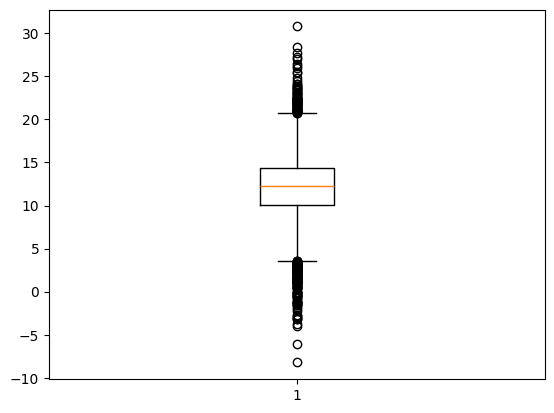

In [41]:
plt.boxplot(y_train_unscaled)
plt.show()

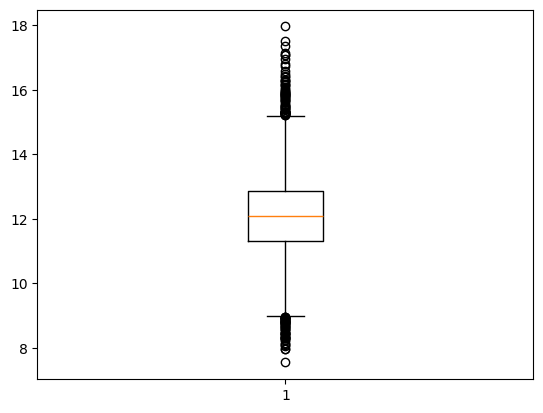

In [42]:
plt.boxplot(y_pred_train_unscaled)
plt.show()

In [35]:
temp_df = pd.DataFrame(y_pred_train_unscaled)
print(temp_df.describe())

                 0
count  8000.000000
mean     12.087922
std       1.217563
min       7.544272
25%      11.313173
50%      12.101053
75%      12.867859
max      17.963929


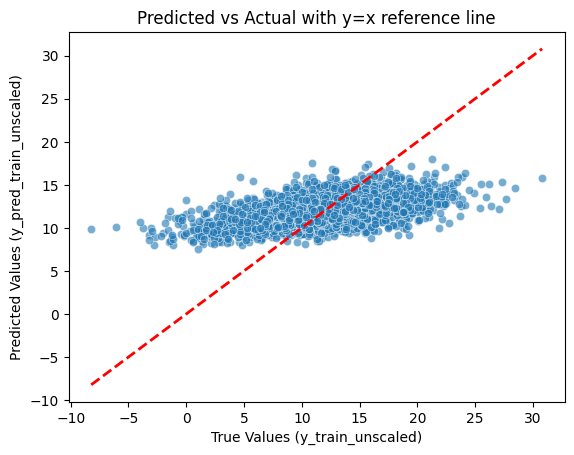

In [49]:
sns.scatterplot(
    x=y_train_unscaled.reshape(-1), 
    y=y_pred_train_unscaled.reshape(-1),
    alpha=0.6
)

# quantile_plot(x=y_train_unscaled.reshape(-1), y=y_pred_train_unscaled.reshape(-1), ax=ax, bins=10)

# Add line y = x
lims = [
    np.min([y_train_unscaled, y_pred_train_unscaled]),
    np.max([y_train_unscaled, y_pred_train_unscaled]),
]
plt.plot(lims, lims, 'r--', linewidth=2)  # red dashed line
plt.xlabel("True Values (y_train_unscaled)")
plt.ylabel("Predicted Values (y_pred_train_unscaled)")
plt.title("Predicted vs Actual with y=x reference line")
plt.show()

In [53]:
print(1-np.std(y_pred_train_unscaled)/np.std(y_train_unscaled))  # << 1 ? shrink
print(np.mean(y_pred_train_unscaled), np.mean(y_train_unscaled))


0.6653075841713756
12.087921709606746 12.087921709606748


### Testing Data Generation

In [353]:
y_pred_test = pred_func(
                        X_test_df, model, 
                        list(selected_var_dict.keys()), list(selected_var_dict.values())
                       )
y_pred_test = y_pred_test.reshape(test_count)

np.save("pred_dwight.npy", y_pred_test)

/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
